In [1]:
import sys
from os import path

import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np
np.random.seed(2019)
from sklearn import datasets
from sklearn.manifold import TSNE
import pandas as pd
from sklearn.decomposition import PCA
import tensorflow as tf

from visualize import tsne, draw_embedded_data_and_boundary
from S3VM import S3VM

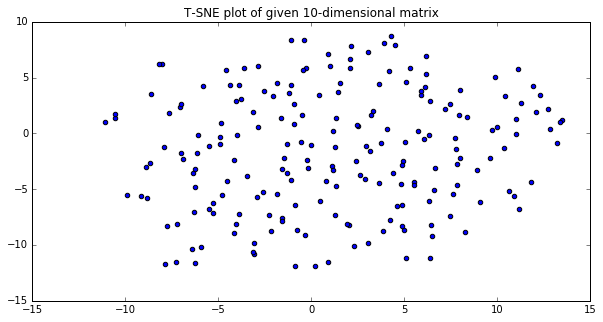

In [2]:
data = pd.read_csv('./data/problem2_training_data.csv', header=None)
test_data = pd.read_csv('./data/problem2_test_datasets.csv', header=None)
X = data.values
X_test = test_data.values
n_dim = 2
X_embedded = tsne(X, n_components=n_dim)

In [3]:
pca = PCA(n_components=10)
pca.fit(X)
pca.explained_variance_ratio_

array([0.14145205, 0.12736329, 0.12011781, 0.1086937 , 0.09925834,
       0.09609362, 0.0862005 , 0.08095299, 0.0754088 , 0.0644589 ])

22
Instructions for updating:
Colocations handled automatically by placer.
Do self-labeling...
3 data is assigned new label
vote results for each data : [ 5.  3.  1. -3.]
Do self-labeling...
1 data is assigned new label
vote results for each data : [-1.  5.  1. -1.]
Do self-labeling...
4 data is assigned new label
vote results for each data : [ 5. -5. -3.  3.]
Do self-labeling...
3 data is assigned new label
vote results for each data : [ 1.  5. -5.  5.]
Do self-labeling...
2 data is assigned new label
vote results for each data : [ 3. -1. -1. -5.]
Do self-labeling...
2 data is assigned new label
vote results for each data : [ 5. -5. -1. -1.]
Do self-labeling...
3 data is assigned new label
vote results for each data : [3. 5. 1. 5.]
Do self-labeling...
4 data is assigned new label
vote results for each data : [ 5. -5.  5.  5.]
Do self-labeling...
4 data is assigned new label
vote results for each data : [ 3. -3.  3.  5.]
Do self-labeling...
2 data is assigned new label
vote results for

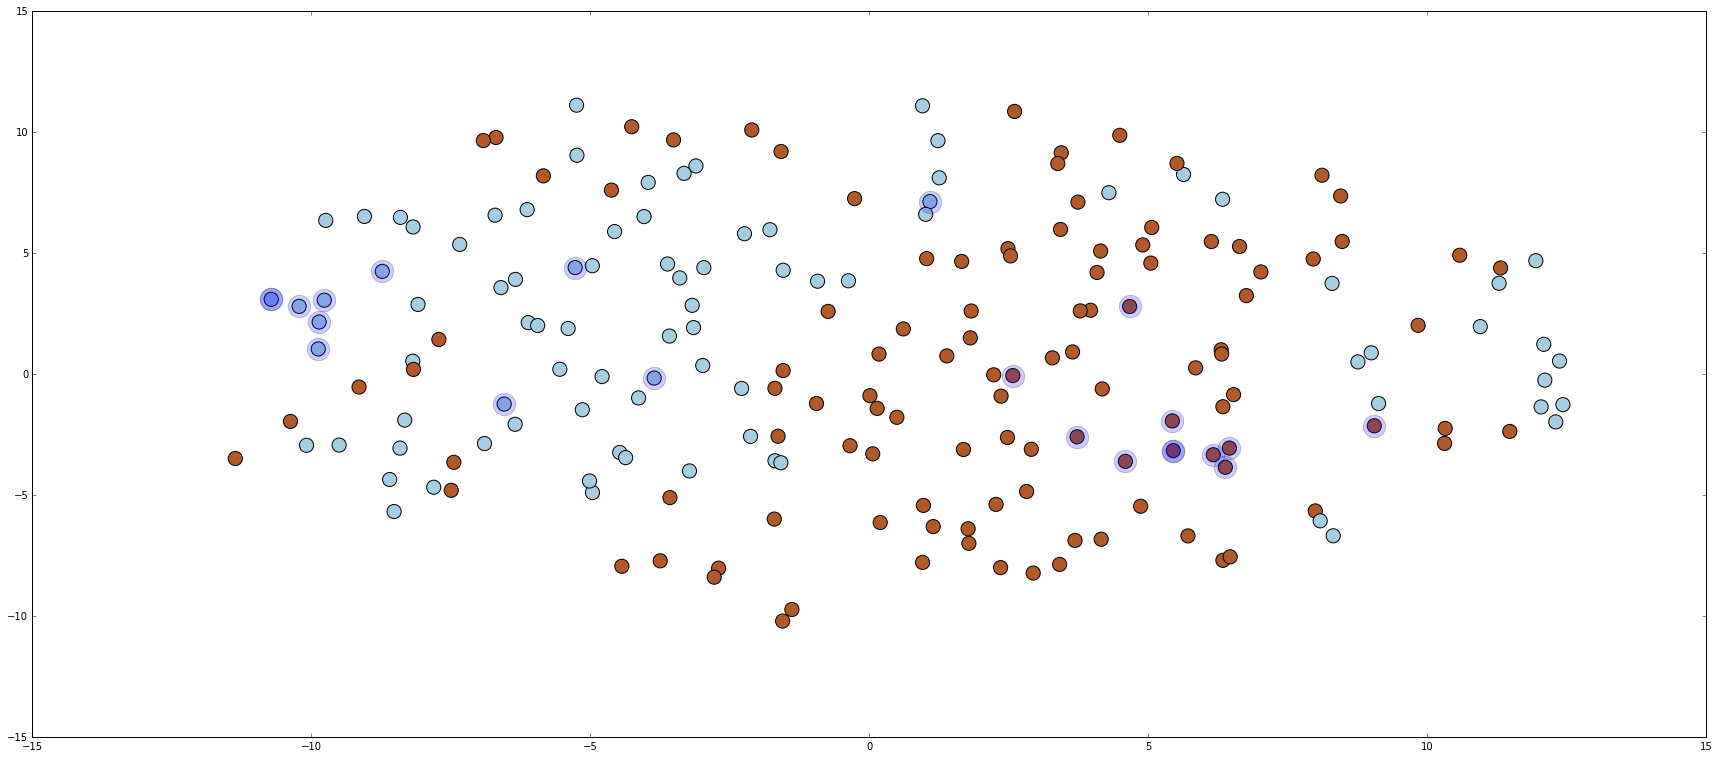

In [4]:
with tf.Session() as sess:
    svm = S3VM(X, sess, kernel='linear', kernel_dim=25, lr_init=0.01, 
               lr_decay=0.001, gamma=1.0, k_cluster=10, 
               k_unlabel=5, epoch=15000, batch=4, lamb=0.01, 
               self_training=True, self_training_ths=10000, min_unlabel_data=140, verbose=True, verbose_loss=False)
    svm.train()
    draw_embedded_data_and_boundary(X, svm, n_dim=n_dim)
    y_test = svm.decision_function(X_test)
